<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-del-proyecto-equipo-149/blob/main/Semana_4_Actividad_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

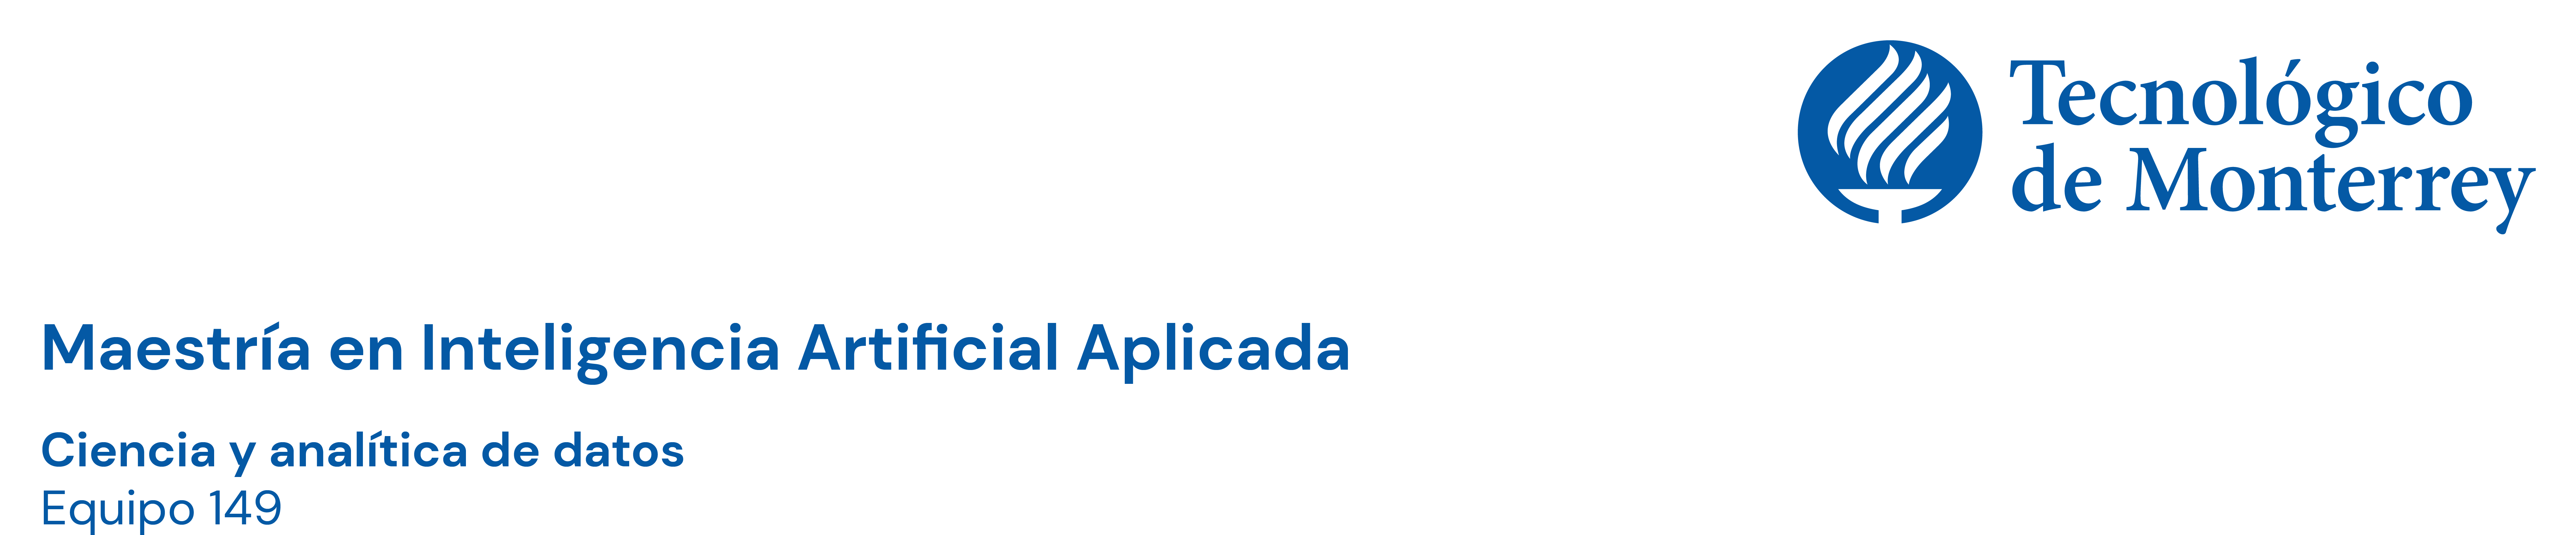

# Semana 4 - Actividad 1

## Datos generales

- Nombre:
    - **Ignacio Valdés Reyes** *A01793262* a01793262@tec.mx
    - **Carlos Gustavo López Lerma** *A01793468* a01793468@tec.mx
- Materia: Ciencia y analítica de datos
- Profesor: Jobish Vallikavungal Devassia
- Fecha: 11 de octubre, 2022

## Antecedentes

In [85]:
# Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [86]:
# Importar data frame
clients = "https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv"

dfclients = pd.read_csv(clients)
df = dfclients.copy()

df.shape

(30000, 25)

In [87]:
df

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1.0,3.0,1.0,39.0,0.0,0.0,0.0,0.0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0.0
29996,29997,150000,1.0,3.0,2.0,43.0,-1.0,-1.0,-1.0,-1.0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0.0
29997,29998,30000,1.0,2.0,2.0,37.0,4.0,3.0,2.0,-1.0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1.0
29998,29999,80000,1.0,3.0,1.0,41.0,1.0,-1.0,0.0,0.0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1.0


Una vez importado el Dataframe, se procede como primera medida a revisar si las columnas tienen datos nulos. Se evidencia que, de las 25 campos, 23 tienen entre 1 y 17 datos nulos. Considerando la base de 30.000 regs, es muy baja frecuencia.

In [88]:
# Verificar si faltan datos
df.isnull().sum()

ID      0
X1      0
X2      1
X3      2
X4      2
X5      5
X6      3
X7      5
X8      7
X9      9
X10    16
X11    14
X12    11
X13    11
X14    13
X15    15
X16    17
X17    10
X18     8
X19     9
X20     8
X21    11
X22    11
X23     5
Y       3
dtype: int64

Se revisa que los datos de cada columna correspondan con la información que deben tener. Por ejemplo, no tener edades negativas o niveles de educación o genero por fuera de los rangos establecidos

In [89]:
#Nota: se ejecuta la misma consulta por cada campo
print (df['X5'].value_counts())

print(df['X5'].min(), df['X5'].max())

29.0    1605
27.0    1477
28.0    1409
30.0    1395
26.0    1256
31.0    1217
25.0    1186
34.0    1162
32.0    1158
33.0    1146
24.0    1127
35.0    1113
36.0    1108
37.0    1041
39.0     954
38.0     943
23.0     931
40.0     870
41.0     823
42.0     794
44.0     700
43.0     669
45.0     617
46.0     570
22.0     560
47.0     499
48.0     466
49.0     452
50.0     411
51.0     340
53.0     325
52.0     304
54.0     247
55.0     209
56.0     178
58.0     122
57.0     122
59.0      83
60.0      67
21.0      67
61.0      56
62.0      44
63.0      31
64.0      31
66.0      25
65.0      24
67.0      16
69.0      15
70.0      10
68.0       5
73.0       4
72.0       3
75.0       3
71.0       3
79.0       1
74.0       1
Name: X5, dtype: int64
21.0 79.0


In [90]:
# Copiar base de datos
ndf = df.copy()

# Cambiar nombres de columnas
ndf.columns = ["ID", "Amount", "Gender", "Education", "Marital_status", "Age", "September_05", "August_05", "July_05", "June_05", "May_05", "April_05", "Amount_September", "Amount_August", "Amount_July", "Amount_June", "Amount_May", "Amount_April", "Payment_September", "Payment_August", "Payment_July", "Payment_June", "Payment_May", "Payment_April", "Y"]

# Rellenar datos nulos con datos de siguiente fila en columna Age (por la poca cantidad de datos nulos)
ndf["Age"].ffill(inplace=True)

# Ordenar por edad
ndf = ndf.sort_values("Age")

# Cambiar posición de columna Age
#first_column = ndf.pop("Age") 
#ndf.insert(0, "Age", first_column) 

ndf

,ID,Amount,Gender,Education,Marital_status,Age,September_05,August_05,July_05,June_05,...,Amount_June,Amount_May,Amount_April,Payment_September,Payment_August,Payment_July,Payment_June,Payment_May,Payment_April,Y
12305,12306,30000,2.0,2.0,2.0,21.0,-1.0,-1.0,0.0,0.0,...,3562.0,1621.0,1307.0,20002.0,1101.0,1.0,1724.0,1408.0,0.0,0.0
21720,21721,20000,2.0,2.0,2.0,21.0,0.0,0.0,0.0,0.0,...,13560.0,11748.0,10632.0,1318.0,1499.0,1099.0,333.0,2000.0,2000.0,0.0
7984,7985,30000,2.0,3.0,2.0,21.0,2.0,2.0,2.0,0.0,...,27262.0,27262.0,24265.0,3700.0,0.0,0.0,0.0,0.0,0.0,0.0
21719,21720,30000,2.0,2.0,1.0,21.0,0.0,0.0,0.0,0.0,...,29992.0,21754.0,18519.0,1467.0,1679.0,1230.0,827.0,1000.0,1000.0,0.0
27662,27663,20000,2.0,2.0,2.0,21.0,-1.0,-1.0,2.0,2.0,...,0.0,0.0,0.0,780.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29175,29176,160000,2.0,3.0,1.0,74.0,0.0,0.0,0.0,-1.0,...,16905.0,0.0,19789.0,3783.0,2268.0,16905.0,0.0,19789.0,26442.0,0.0
246,247,250000,2.0,2.0,1.0,75.0,0.0,-1.0,-1.0,-1.0,...,1010.0,5572.0,794.0,1631.0,1536.0,1010.0,5572.0,NaN,NaN,0.0
25141,25142,210000,1.0,2.0,1.0,75.0,0.0,0.0,0.0,0.0,...,203776.0,205901.0,210006.0,9700.0,8810.0,9000.0,7300.0,7500.0,7600.0,0.0
25136,25137,180000,1.0,1.0,1.0,75.0,1.0,-2.0,-2.0,-2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [91]:
# Rellenar datos nulos con promedio de columnas Gender, Education, Marital (por las opciones acotadas en cada variable)
ndf.Gender.fillna(ndf.Gender.mean(), inplace = True)
ndf.Education.fillna(ndf.Education.mean(), inplace = True)
ndf.Marital_status.fillna(ndf.Marital_status.mean(), inplace = True)

ndf.isnull().sum()

ID                    0
Amount                0
Gender                0
Education             0
Marital_status        0
Age                   0
September_05          3
August_05             5
July_05               7
June_05               9
May_05               16
April_05             14
Amount_September     11
Amount_August        11
Amount_July          13
Amount_June          15
Amount_May           17
Amount_April         10
Payment_September     8
Payment_August        9
Payment_July          8
Payment_June         11
Payment_May          11
Payment_April         5
Y                     3
dtype: int64

In [92]:
ndf.shape

(30000, 25)

## Paso 1: Determine el número mínimo de componentes principales que representan la mayor parte de la variación en sus datos

Una vez realizada la selección y limpieza de los datos, procedemos a iniciar el análisis PCA determinando y eliminando las variables categóricas, esto es, aquellas que permiten categorizar y son cualitativas: ID, Gender, Education, Marital_Status, September_05, August_05, July_05, June_05, May_05, April_05, Y

In [93]:
ndf = ndf.drop(axis = 1, columns = ['ID', 'Gender', 'Education', 'Marital_status', 'September_05', 'August_05', 'July_05', 'June_05', 'May_05', 'April_05', 'Y'])

In [94]:
ndf

,Amount,Age,Amount_September,Amount_August,Amount_July,Amount_June,Amount_May,Amount_April,Payment_September,Payment_August,Payment_July,Payment_June,Payment_May,Payment_April
12305,30000,21.0,290.0,12115.0,11306.0,3562.0,1621.0,1307.0,20002.0,1101.0,1.0,1724.0,1408.0,0.0
21720,20000,21.0,19382.0,20040.0,17850.0,13560.0,11748.0,10632.0,1318.0,1499.0,1099.0,333.0,2000.0,2000.0
7984,30000,21.0,28309.0,31229.0,29752.0,27262.0,27262.0,24265.0,3700.0,0.0,0.0,0.0,0.0,0.0
21719,30000,21.0,28404.0,29009.0,29831.0,29992.0,21754.0,18519.0,1467.0,1679.0,1230.0,827.0,1000.0,1000.0
27662,20000,21.0,390.0,780.0,780.0,0.0,0.0,0.0,780.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29175,160000,74.0,79201.0,69376.0,66192.0,16905.0,0.0,19789.0,3783.0,2268.0,16905.0,0.0,19789.0,26442.0
246,250000,75.0,52874.0,1631.0,1536.0,1010.0,5572.0,794.0,1631.0,1536.0,1010.0,5572.0,NaN,NaN
25141,210000,75.0,205601.0,203957.0,199882.0,203776.0,205901.0,210006.0,9700.0,8810.0,9000.0,7300.0,7500.0,7600.0
25136,180000,75.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


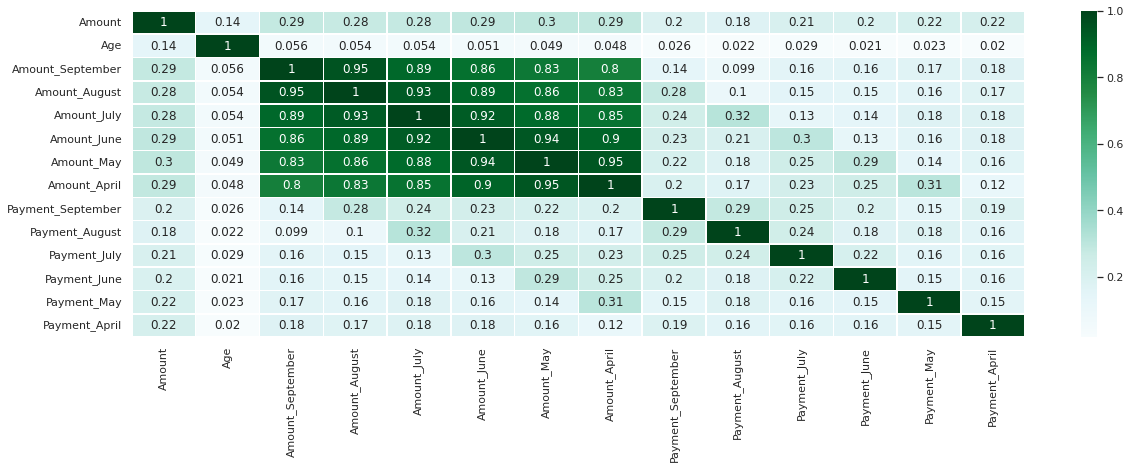

In [95]:
#Identificamos la correlación entre parejas de todas las columnas no categóricas del dataframe
sns.set(rc={'figure.figsize':(20,6)}) 

correlation = ndf.corr()
sns.heatmap(correlation, annot=True, cmap="BuGn", linewidths=0.5) 

plt.show()

## Paso 2: Interprete cada componente principal en términos de las variables originales

El anterior análisis de correlación muestra una alta relación entre los estados de cuenta de abril a septiembre de 2005. Este es un resultado que se esperaba.
De igual forma, hay una correlación entre el monto del crédito y los estados mensuales de cuenta. También hay correlación entre los estados de cuenta de un mes dado y el pago realizado en ese mes. 

A continuación realizamos el análisis de componentes principales (PCA) para identificar aquellas columnas o atributos que son combinaciones lineales de los atributos originales, son perpendiculares entre sí o contienen la máxima variación en los datos.

Tras realizar este análisis se evidencia que los atributos edad y cantidad del préstamo (Comp1 y Comp2) son los que contienen la máxima variación en los datos, con un 90.6%.

La edad aporta el 61% de la variabilidad total, mientras la cantidad del préstamo aporta el 30%.

In [96]:
pcs = PCA()

from sklearn import preprocessing

pcs.fit(preprocessing.scale(ndf.iloc[:, :].dropna(axis = 0)))

pcs.fit(ndf.iloc[:, :].dropna(axis = 0))

df_pcsSummary = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                          'Proportion of variance': pcs.explained_variance_ratio_,
                          'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)#column 
                          }
                          )
df_pcsSummary = df_pcsSummary.transpose()
df_pcsSummary.columns = ['PC{}'.format(i) for i in range (1, len(df_pcsSummary.columns)+1)]
df_pcsSummary

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
Standard deviation,166559.577236,115831.110445,37249.520782,27741.305094,20693.974244,20273.666547,18518.478030,17036.189129,16289.853727,11613.056937,10411.620440,8784.753152,8197.114543,9.114313e+00
Proportion of variance,0.610502,0.295256,0.030534,0.016936,0.009424,0.009045,0.007547,0.006387,0.005840,0.002968,0.002386,0.001698,0.001479,1.828081e-09
Cumulative proportion,0.610502,0.905757,0.936292,0.953227,0.962651,0.971696,0.979243,0.985630,0.991470,0.994438,0.996823,0.998521,1.000000,1.000000e+00


In [97]:
scaler = StandardScaler()
scaled = scaler.fit_transform(ndf)

scaled_df = pd.DataFrame(scaled, columns=ndf.columns)

total_var =scaled_df.var().sum()
pd.DataFrame({
    "Porcentaje Varianza": (scaled_df.var()/ total_var) * 100,
    "Porcentaje Varianza Acumulado": (scaled_df.var().cumsum() / total_var) * 100 })

comps_df = pd.DataFrame(
  pcs.components_.round(4), # pcs.components nos da los pesos de cada uno de los componentes
  columns = df_pcsSummary.columns, #Son 13 columnas, las cuales hacen referencia a cada uno de los componentes: PC1, PC2...PC13
  index = scaled_df.columns) #Las filas son 13 también, las cuales hacen referencia a las variables originales comps_df.iloc[:,:7]

comps_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
Amount,0.4912,0.0,0.3885,0.3815,0.3723,0.3465,0.3230,0.3086,0.0266,0.0313,0.0268,0.0222,0.0222,0.0248
Age,0.8692,0.0,-0.2212,-0.2262,-0.2164,-0.1939,-0.1767,-0.1672,0.0057,0.0108,0.0110,0.0104,0.0117,0.0154
Amount_September,-0.0206,-0.0,-0.5489,-0.3909,-0.0481,0.2610,0.4281,0.4837,0.0375,0.1600,0.1351,0.0944,0.0559,-0.0209
Amount_August,-0.0184,-0.0,-0.2049,-0.0377,0.5534,0.0792,-0.2001,-0.3084,0.1936,0.6732,0.0284,-0.0403,0.0137,0.1232
Amount_July,-0.0441,-0.0,0.3168,0.0116,-0.2478,-0.3676,-0.0157,0.2266,0.2027,0.3372,0.3110,0.4364,0.3550,0.2855
Amount_June,0.0169,0.0,0.0032,-0.0810,0.2957,-0.4734,-0.0783,0.3919,-0.2284,0.1082,-0.5663,0.0205,0.2087,-0.3055
Amount_May,-0.0011,-0.0,-0.4563,0.5269,0.0289,-0.1784,-0.0137,0.0771,0.6115,-0.2549,-0.1530,0.0852,0.0608,0.0458
Amount_April,0.0010,-0.0,0.0070,-0.0657,0.0812,-0.2278,0.4801,-0.2629,-0.0822,-0.0047,-0.3081,0.4482,-0.4817,0.3209
Payment_September,0.0095,0.0,0.0703,0.0993,-0.1081,-0.0974,0.1264,-0.1054,0.1709,0.2264,0.2280,0.2272,-0.3074,-0.8113
Payment_August,0.0038,-0.0,0.1724,0.0082,-0.3364,-0.1371,0.1008,0.2370,0.2790,0.3581,-0.2012,-0.5908,-0.3930,0.1478


In [98]:
comps_df.iloc[:,:].idxmax()

PC1                  Age
PC2        Payment_April
PC3               Amount
PC4           Amount_May
PC5        Amount_August
PC6               Amount
PC7         Amount_April
PC8     Amount_September
PC9           Amount_May
PC10       Amount_August
PC11        Payment_July
PC12        Amount_April
PC13         Amount_July
PC14        Amount_April
dtype: object

Habiendo identificado que los atributos Payment_April y Amount contienen la máxima variación, procedemos a modelar la regresión lineal.
Se evidencia que en efecto hay una relación positiva entre Payment_April y Amount.

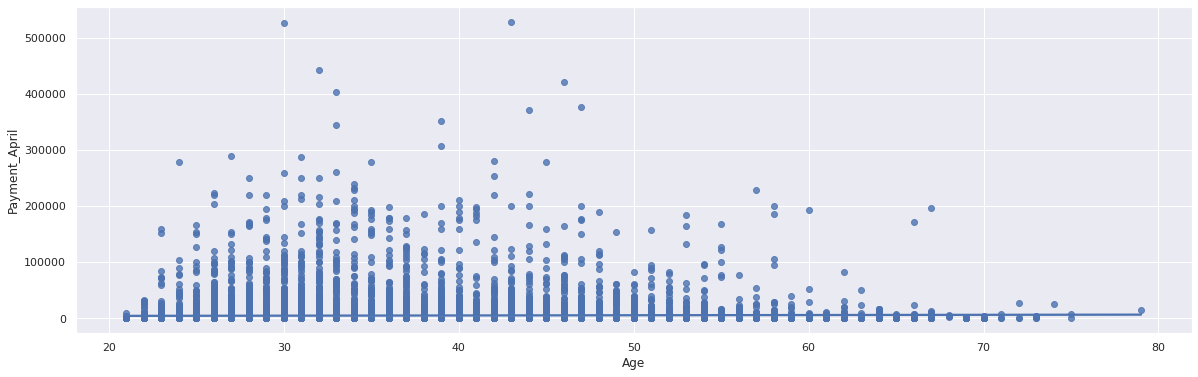

In [99]:
p = sns.regplot(data = ndf,  
                x = ndf.Age, 
                y = ndf.Payment_April
               ) 
p

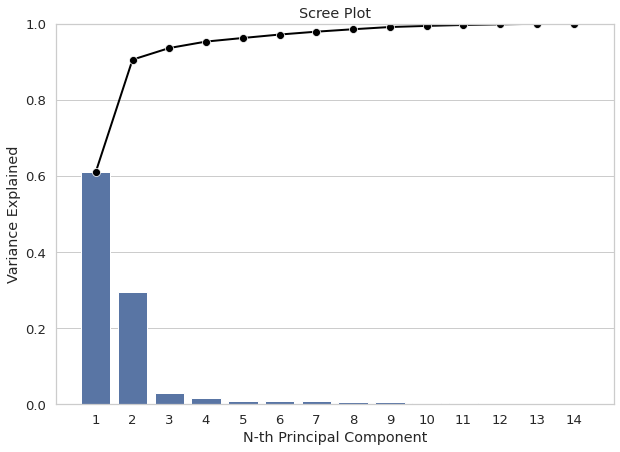

In [100]:
PC_components = np.arange(pcs.n_components_) + 1
#PC_components

_ = sns.set(style = 'whitegrid', 
            font_scale = 1.2
            )

fig, ax = plt.subplots(figsize=(10, 7))

_ = sns.barplot(x = PC_components, 
                y = pcs.explained_variance_ratio_, 
                color = 'b'
                )

_ = sns.lineplot(x = PC_components-1, 
                 y = np.cumsum(pcs.explained_variance_ratio_), 
                 color = 'black', 
                 linestyle = '-', 
                 linewidth = 2, 
                 marker = 'o', 
                 markersize = 8
                 )

plt.title('Scree Plot')
plt.xlabel('N-th Principal Component')
plt.ylabel('Variance Explained')
plt.ylim(0, 1)
plt.show()

Los dos componentes de variación más alta posible son: "Age" y "Amount_April". Los componentes siguientes tienen la variación más alta bajo la restricción que es perpendicular a los componentes anteriores.

In [101]:
pcs.components_.round(4)

array([[ 0.4912,  0.    ,  0.3885,  0.3815,  0.3723,  0.3465,  0.323 ,
         0.3086,  0.0266,  0.0313,  0.0268,  0.0222,  0.0222,  0.0248],
       [ 0.8692,  0.    , -0.2212, -0.2262, -0.2164, -0.1939, -0.1767,
        -0.1672,  0.0057,  0.0108,  0.011 ,  0.0104,  0.0117,  0.0154],
       [-0.0206, -0.    , -0.5489, -0.3909, -0.0481,  0.261 ,  0.4281,
         0.4837,  0.0375,  0.16  ,  0.1351,  0.0944,  0.0559, -0.0209],
       [-0.0184, -0.    , -0.2049, -0.0377,  0.5534,  0.0792, -0.2001,
        -0.3084,  0.1936,  0.6732,  0.0284, -0.0403,  0.0137,  0.1232],
       [-0.0441, -0.    ,  0.3168,  0.0116, -0.2478, -0.3676, -0.0157,
         0.2266,  0.2027,  0.3372,  0.311 ,  0.4364,  0.355 ,  0.2855],
       [ 0.0169,  0.    ,  0.0032, -0.081 ,  0.2957, -0.4734, -0.0783,
         0.3919, -0.2284,  0.1082, -0.5663,  0.0205,  0.2087, -0.3055],
       [-0.0011, -0.    , -0.4563,  0.5269,  0.0289, -0.1784, -0.0137,
         0.0771,  0.6115, -0.2549, -0.153 ,  0.0852,  0.0608,  0.0458],

In [102]:
pcsComponents_df = pd.DataFrame(pcs.components_.transpose(), 
                                columns = df_pcsSummary.columns,
                                index = ndf.iloc[:, :].columns
                                )
pcsComponents_df.iloc[:,:2]

,PC1,PC2
Amount,0.491230,0.869225
Age,0.000006,0.000008
Amount_September,0.388548,-0.221195
Amount_August,0.381452,-0.226220
Amount_July,0.372269,-0.216375
Amount_June,0.346480,-0.193901
Amount_May,0.322989,-0.176653
Amount_April,0.308644,-0.167246
Payment_September,0.026568,0.005741
Payment_August,0.031283,0.010814


## Paso 3: Identifique valores atípicos

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


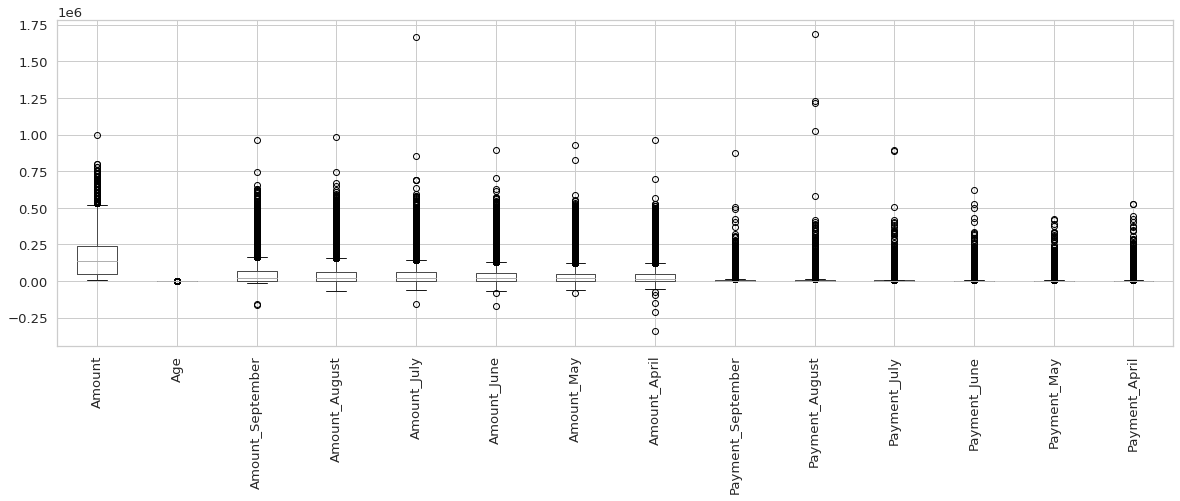

In [103]:
ndf.boxplot(rot=90)

Las variables con datos atípicos positivos son: Payment_August, Amount_July y los amounts de los siguientes meses. Las variables con datos atípicos negativos son Amount_Abril y Amount_June, que corresponden a la deuda en el estado de cuenta. 

## Parte 2

**1. ¿Cuál es el número de componentes mínimo y por qué?** 2 porque permite hacer el análisis entre 2 dimensiones para visualizar su relación entre los datos. En este caso, con 2 componentes se tiene una proporción acumulada de varianza de 90%.

**2. ¿Cuál es la variación de los datos que representan esos componentes?** Age = .610502	Payment_April = 0.295256

**3. ¿Cuál es la pérdida de información después de realizar PCA?**
Al quitar los componentes no significativos, eliminamos 12 atributos que reducirá la dimensionalidad en 2, que por consecuencia provocará una pérdida de datos aproximada al 10% de la proporción acumulada de varianza. Dependerá de cada proyecto el conservar o descartar los de menor importancia según lo que se esté buscando

**4. De las variables originales, ¿Cuál tiene mayor y cuál tiene menor importancia en los componentes principales?** El componente con mayor importancia es Age = .610502 y el que tiene menor importancia Amount_April = 1.828081e-09

**5. ¿Cuándo se recomienda realizar un PCA y qué beneficios ofrece para Machine Learning?**
  - En data sets con miles de registros y una gran cantidad de dimensiones.
  - Cuando es necsario intepretae una gran cantidad de datos, pero preservando información.
  - Para facilitar la visualización de análisis de datos.